## PRCP-1009-CellphonePrice
### Details:
#### Name: Rupesh Dinkar Chavan
#### Project team's ID: PTID-CDS-JAN-24-1743
#### Batch Code: 14-AUG-23-CDS-WDA16-PUN
#### Registered Email ID: rupeshchavan712@gmail.com
#### Registration Number: +91 7798539541

In [1]:
# importing all needed libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Loaded dataset

In [2]:
data =pd.read_csv( "C:\\Users\\rupes\\1009.csv" )

In [3]:
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

# Basic Cheacks 

In [4]:
data.head(10) #   Show first 10 rows of data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   
6        139        8  ...        381      1018  3220    13     8         18   
7        187        4  ...        512      1149   700    16     3          5   
8        174        7  ...        386       836  1099    17     1         20   
9         93        5  ...       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0  

[10 rows x 21 columns]

In [5]:
data.tail(10) # Show last 10 rows of data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1990           1617     1          2.4         0   8       1          36   
1991           1882     0          2.0         0  11       1          44   
1992            674     1          2.9         1   1       0          21   
1993           1467     1          0.5         0   0       0          18   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1990    0.8         85        1  ...        743      1426   296     5     3   
1991    0.8        113        8  ...          4       743  3579    19     8   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1993    0.6        122        5  ...        888      1099  3962    15    11   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1990          7        1             0     0            0  
1991         20        1             1     0            3  
1992          4        1             1     1            0  
1993          5        1             1     1            3  
1994          3        1             1     0            3  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[10 rows x 21 columns]

In [6]:
# It will give all statistical information of columns having numerical data type
data.describe()  

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [7]:
data.shape

(2000, 21)

In [8]:
# It will show all details of data 
# Such as Data Types, Total entries, Total numbers of columns, 
# Null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Exploratory data analysis

### Univariate Analysis

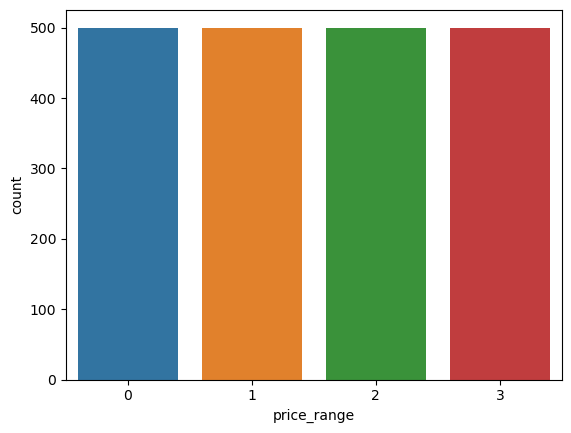

In [14]:
# Count plot of target varible's observations
sns.countplot(x='price_range', data=data)
plt.show()

In [15]:
import sweetviz as sv
my_data=sv.analyze(data)
my_data.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


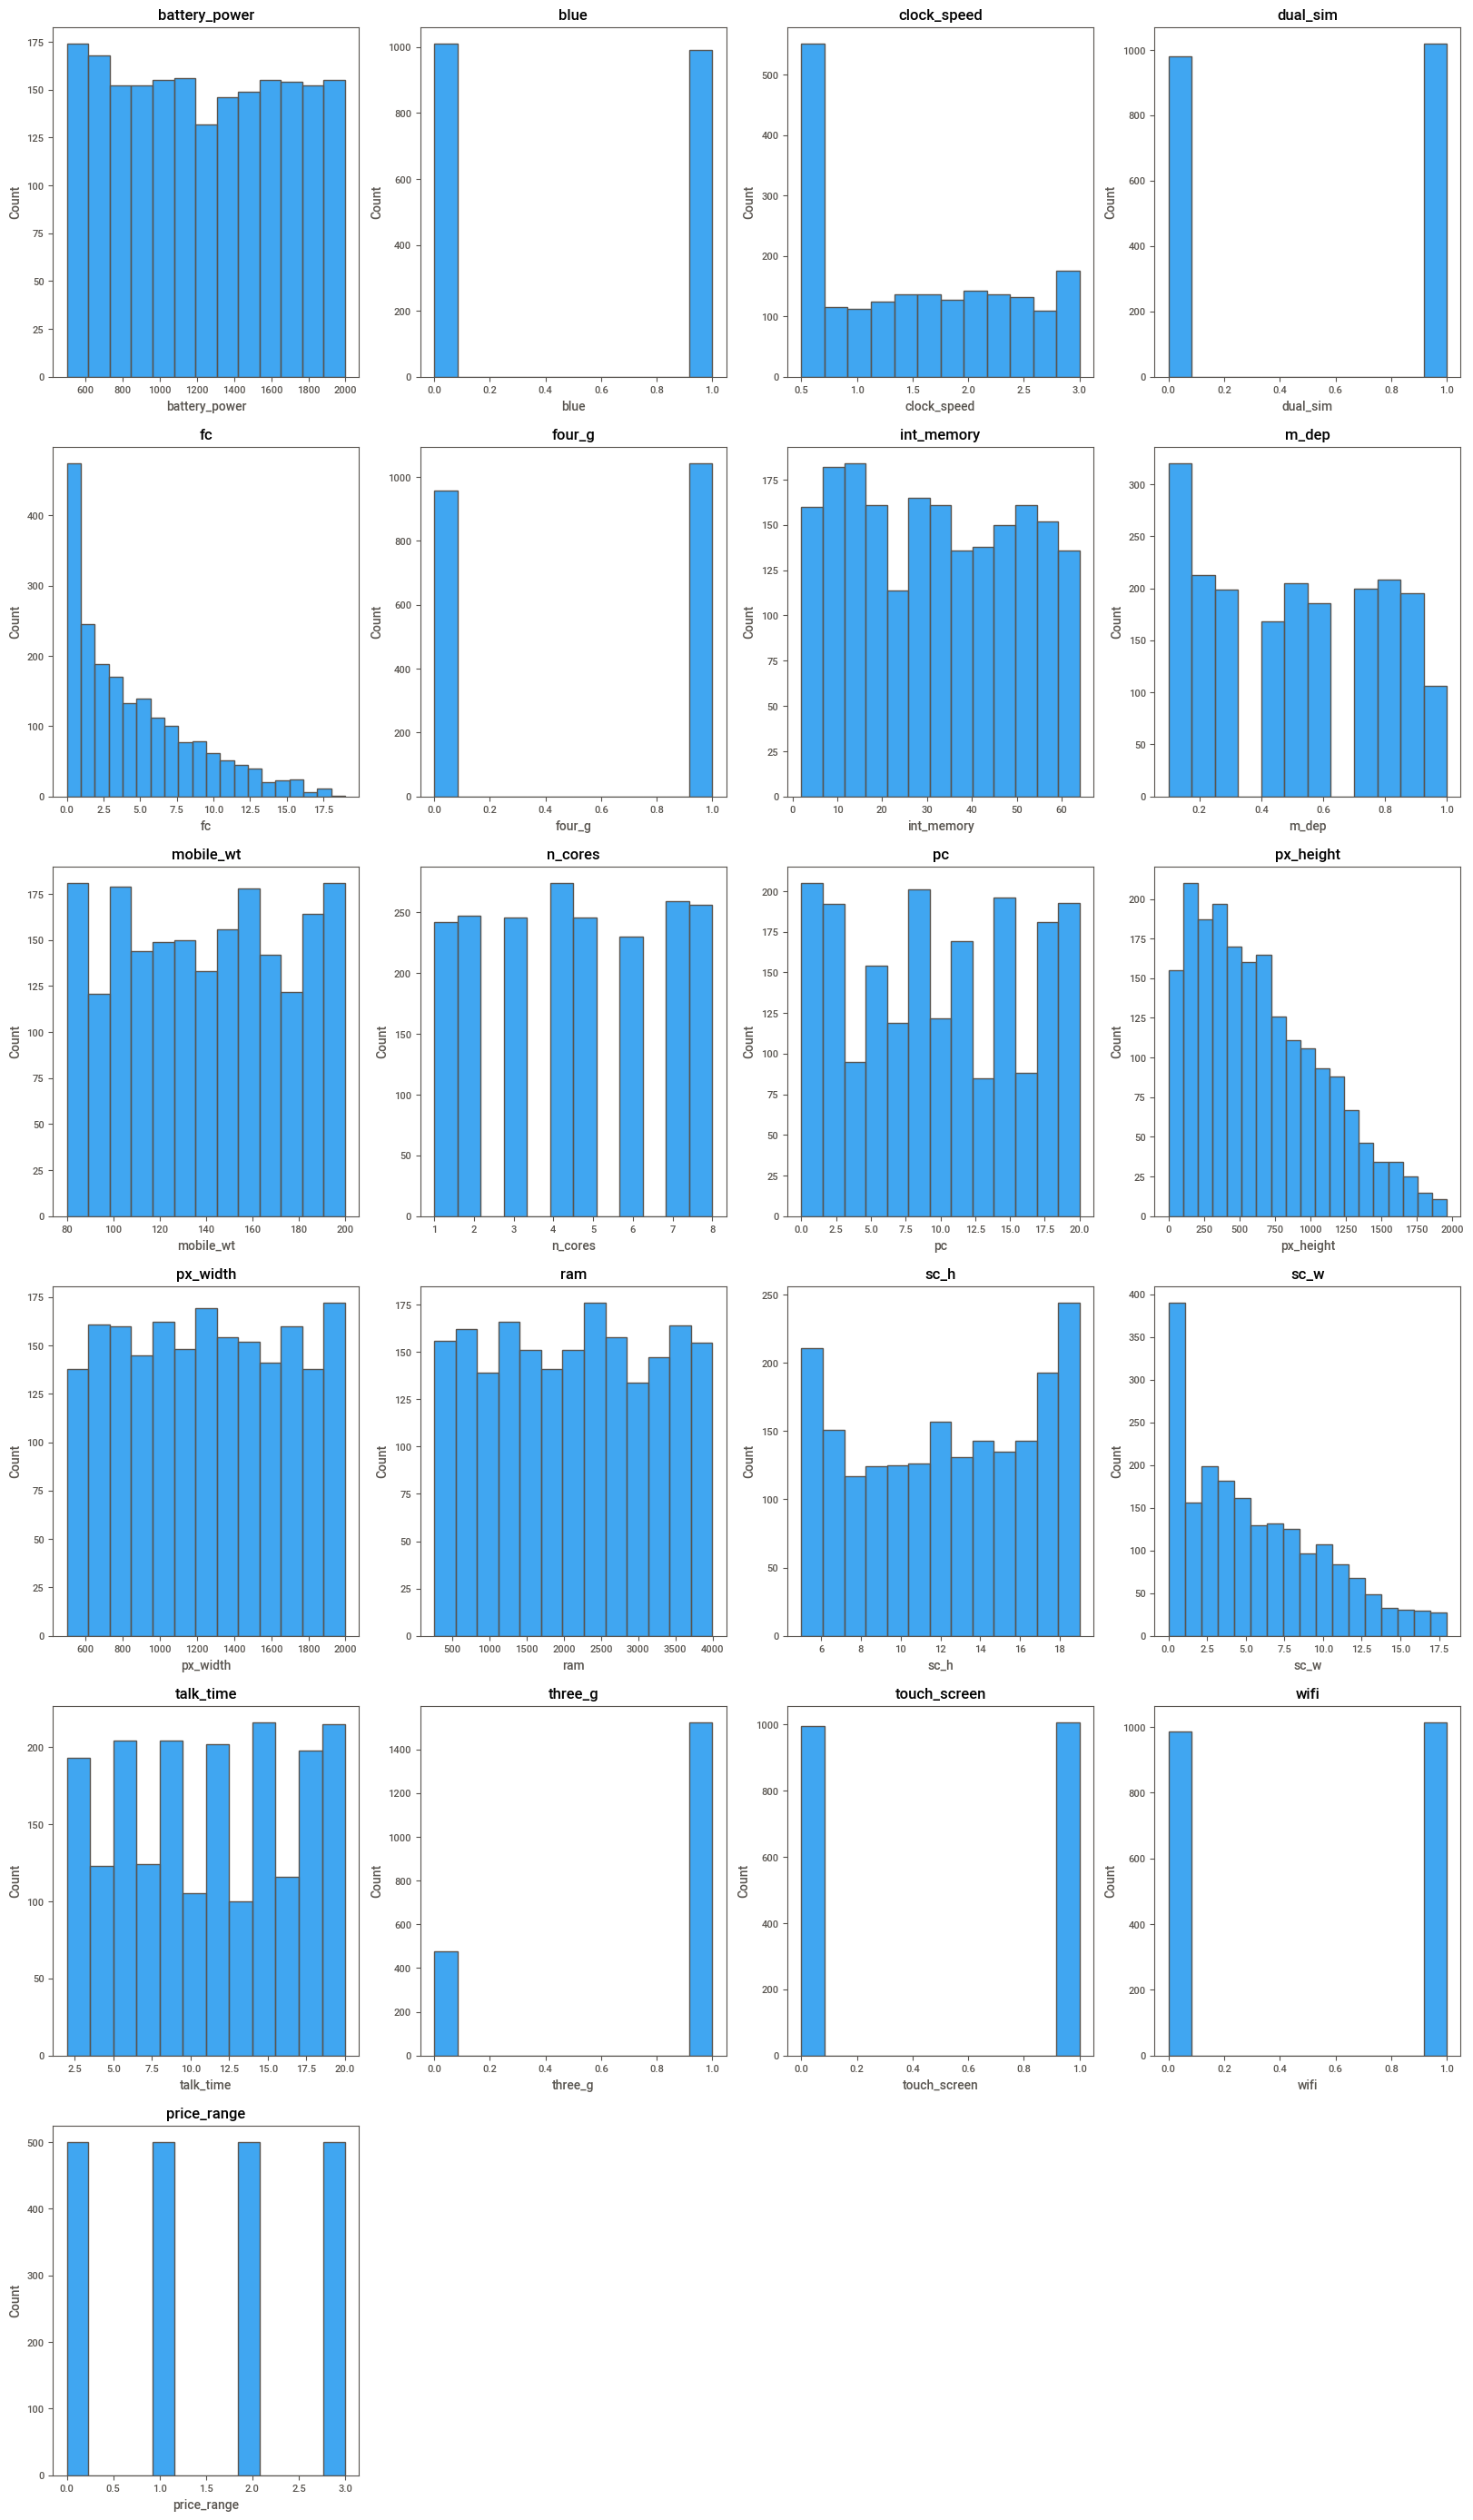

In [16]:
# Plotting the distribution of each column in 'data' using Seaborn
plt.figure(figsize=(20,35))
i=1
for x in data.columns:
    plt.subplot(6,4,i)
    sns.histplot(data[x])
    plt.title(x)
    i+=1

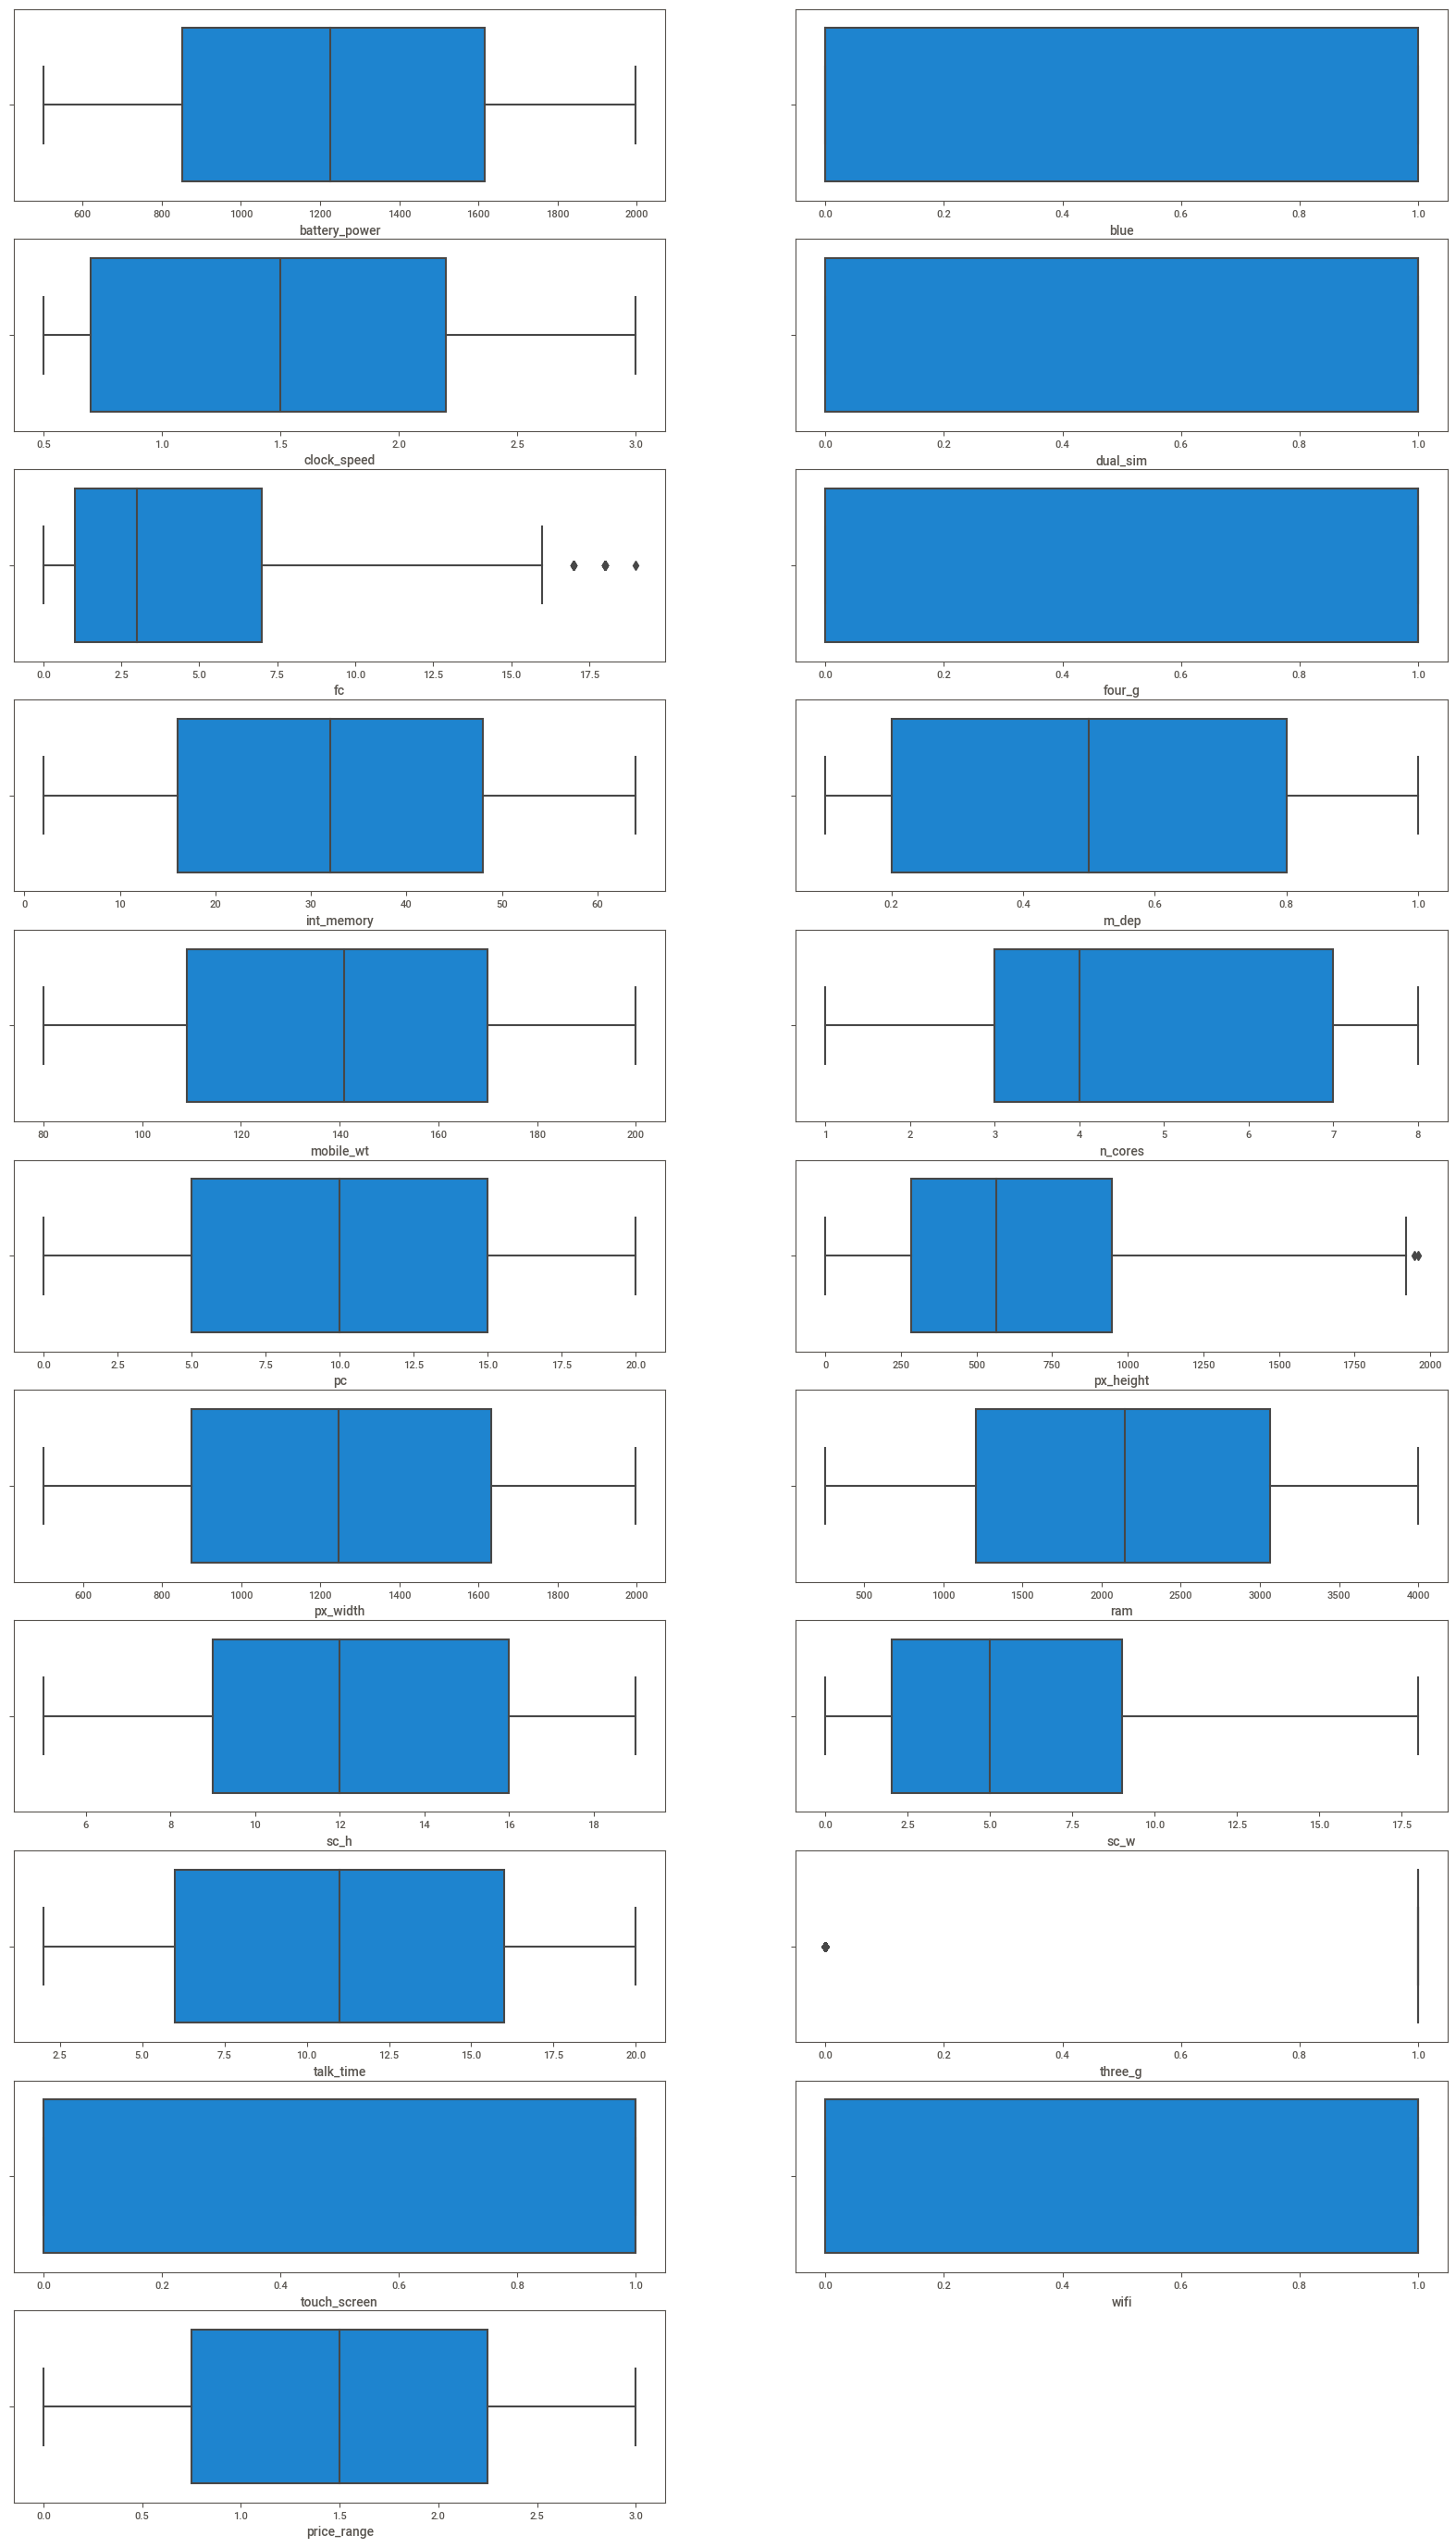

In [17]:
# Plotting of BoxPlot to check presence of Outliers

plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=21:
        ax=plt.subplot(11,2,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
        

### Observation:
 
#### The outliers are founds in the belows columns_name:
 ##### 1. fc
 ##### 2.px_height
 ##### 3.three_g
 
 

### Bivariate Analysis

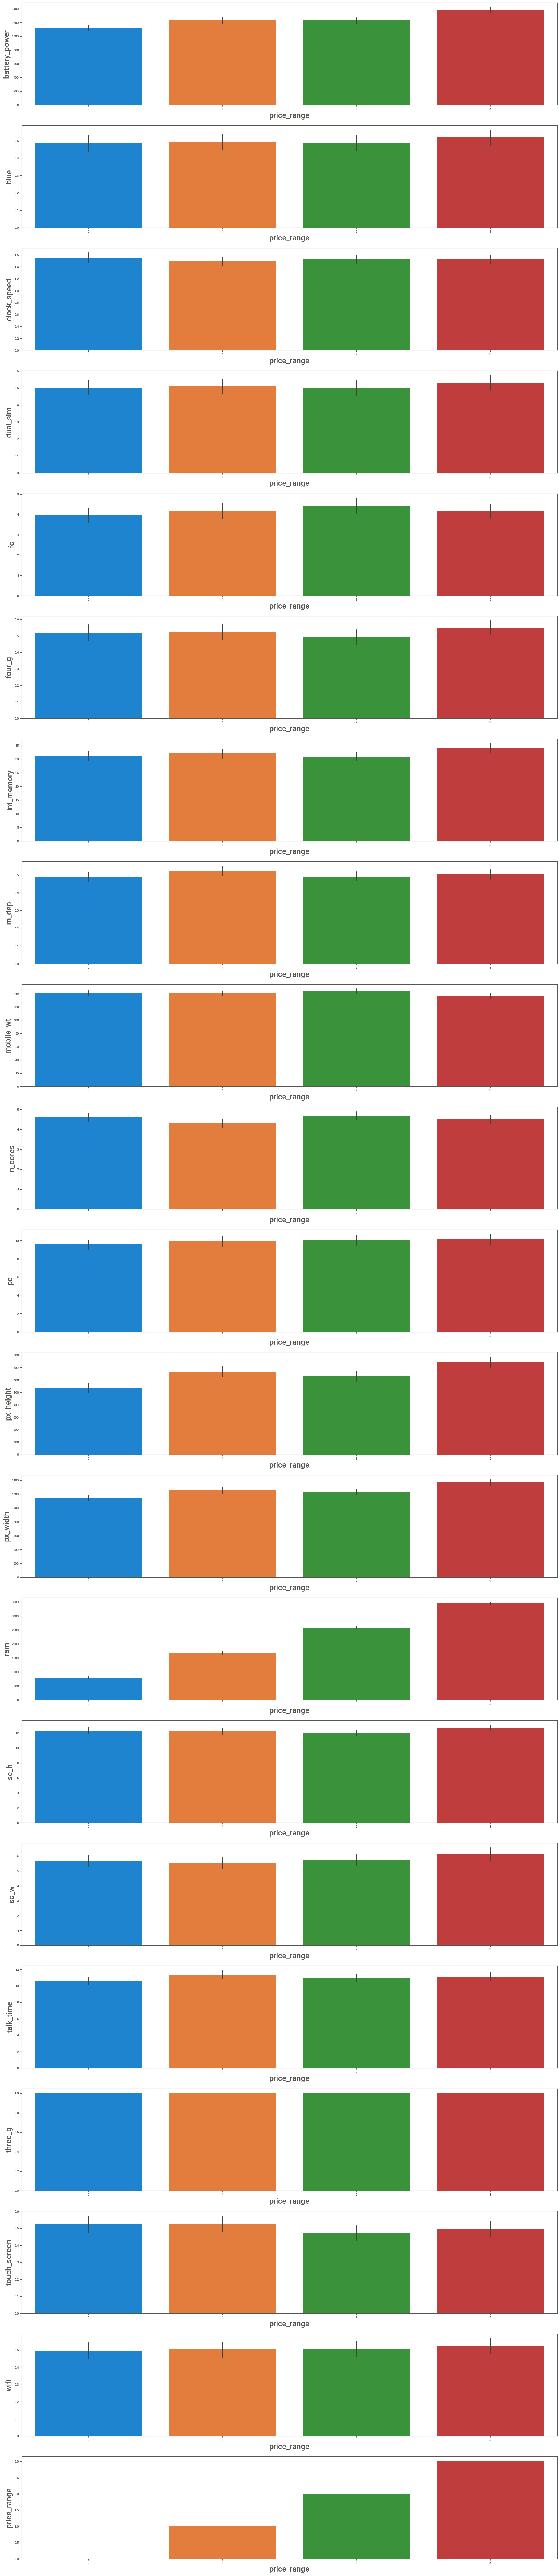

In [118]:
plt.figure(figsize=(25,120),facecolor='white')
plotnum=1
for c in data.columns:
    if(plotnum<=21):
        ax=plt.subplot(21,1,plotnum)
        sns.barplot(x=data['price_range'],y=data[c])
        plt.xlabel('price_range',fontsize=20)
        plt.ylabel(c,fontsize=20)
        
    plotnum+=1
plt.show() 

## Obsevation
1. Good quality battery is available at very high cost cmpared to high cost or medium cost.
2. Almost all mobile phone have bluetooth but mostly bluetooth option is availabled inn very high cost/There is not more differance in in bluetooth option in all price_range.
3. Clock_speed is almost same inn all price_range options.
4. Dual_sim feature have some more in very high cost price as compared to all and there are others are equal in dual_sim feature.
5. fc best quality is available in high cost price range  as compare to others.
   not differance between very high cost mobiles fc and medium cost fc.
6. Near about all mobile phones have four_g.
7. We are grtting some extra gigabytes in very high cost mobiles as compares to others.and also there is no extra differance in very high cost and low cost or medium cost'
8. In very high cost mobile weight are some light in compares to other.
9. we getting some high processor mobile in high cost price_range.
10. We are getting a better ram mobile as our price_range.

# Multivarient anaysis


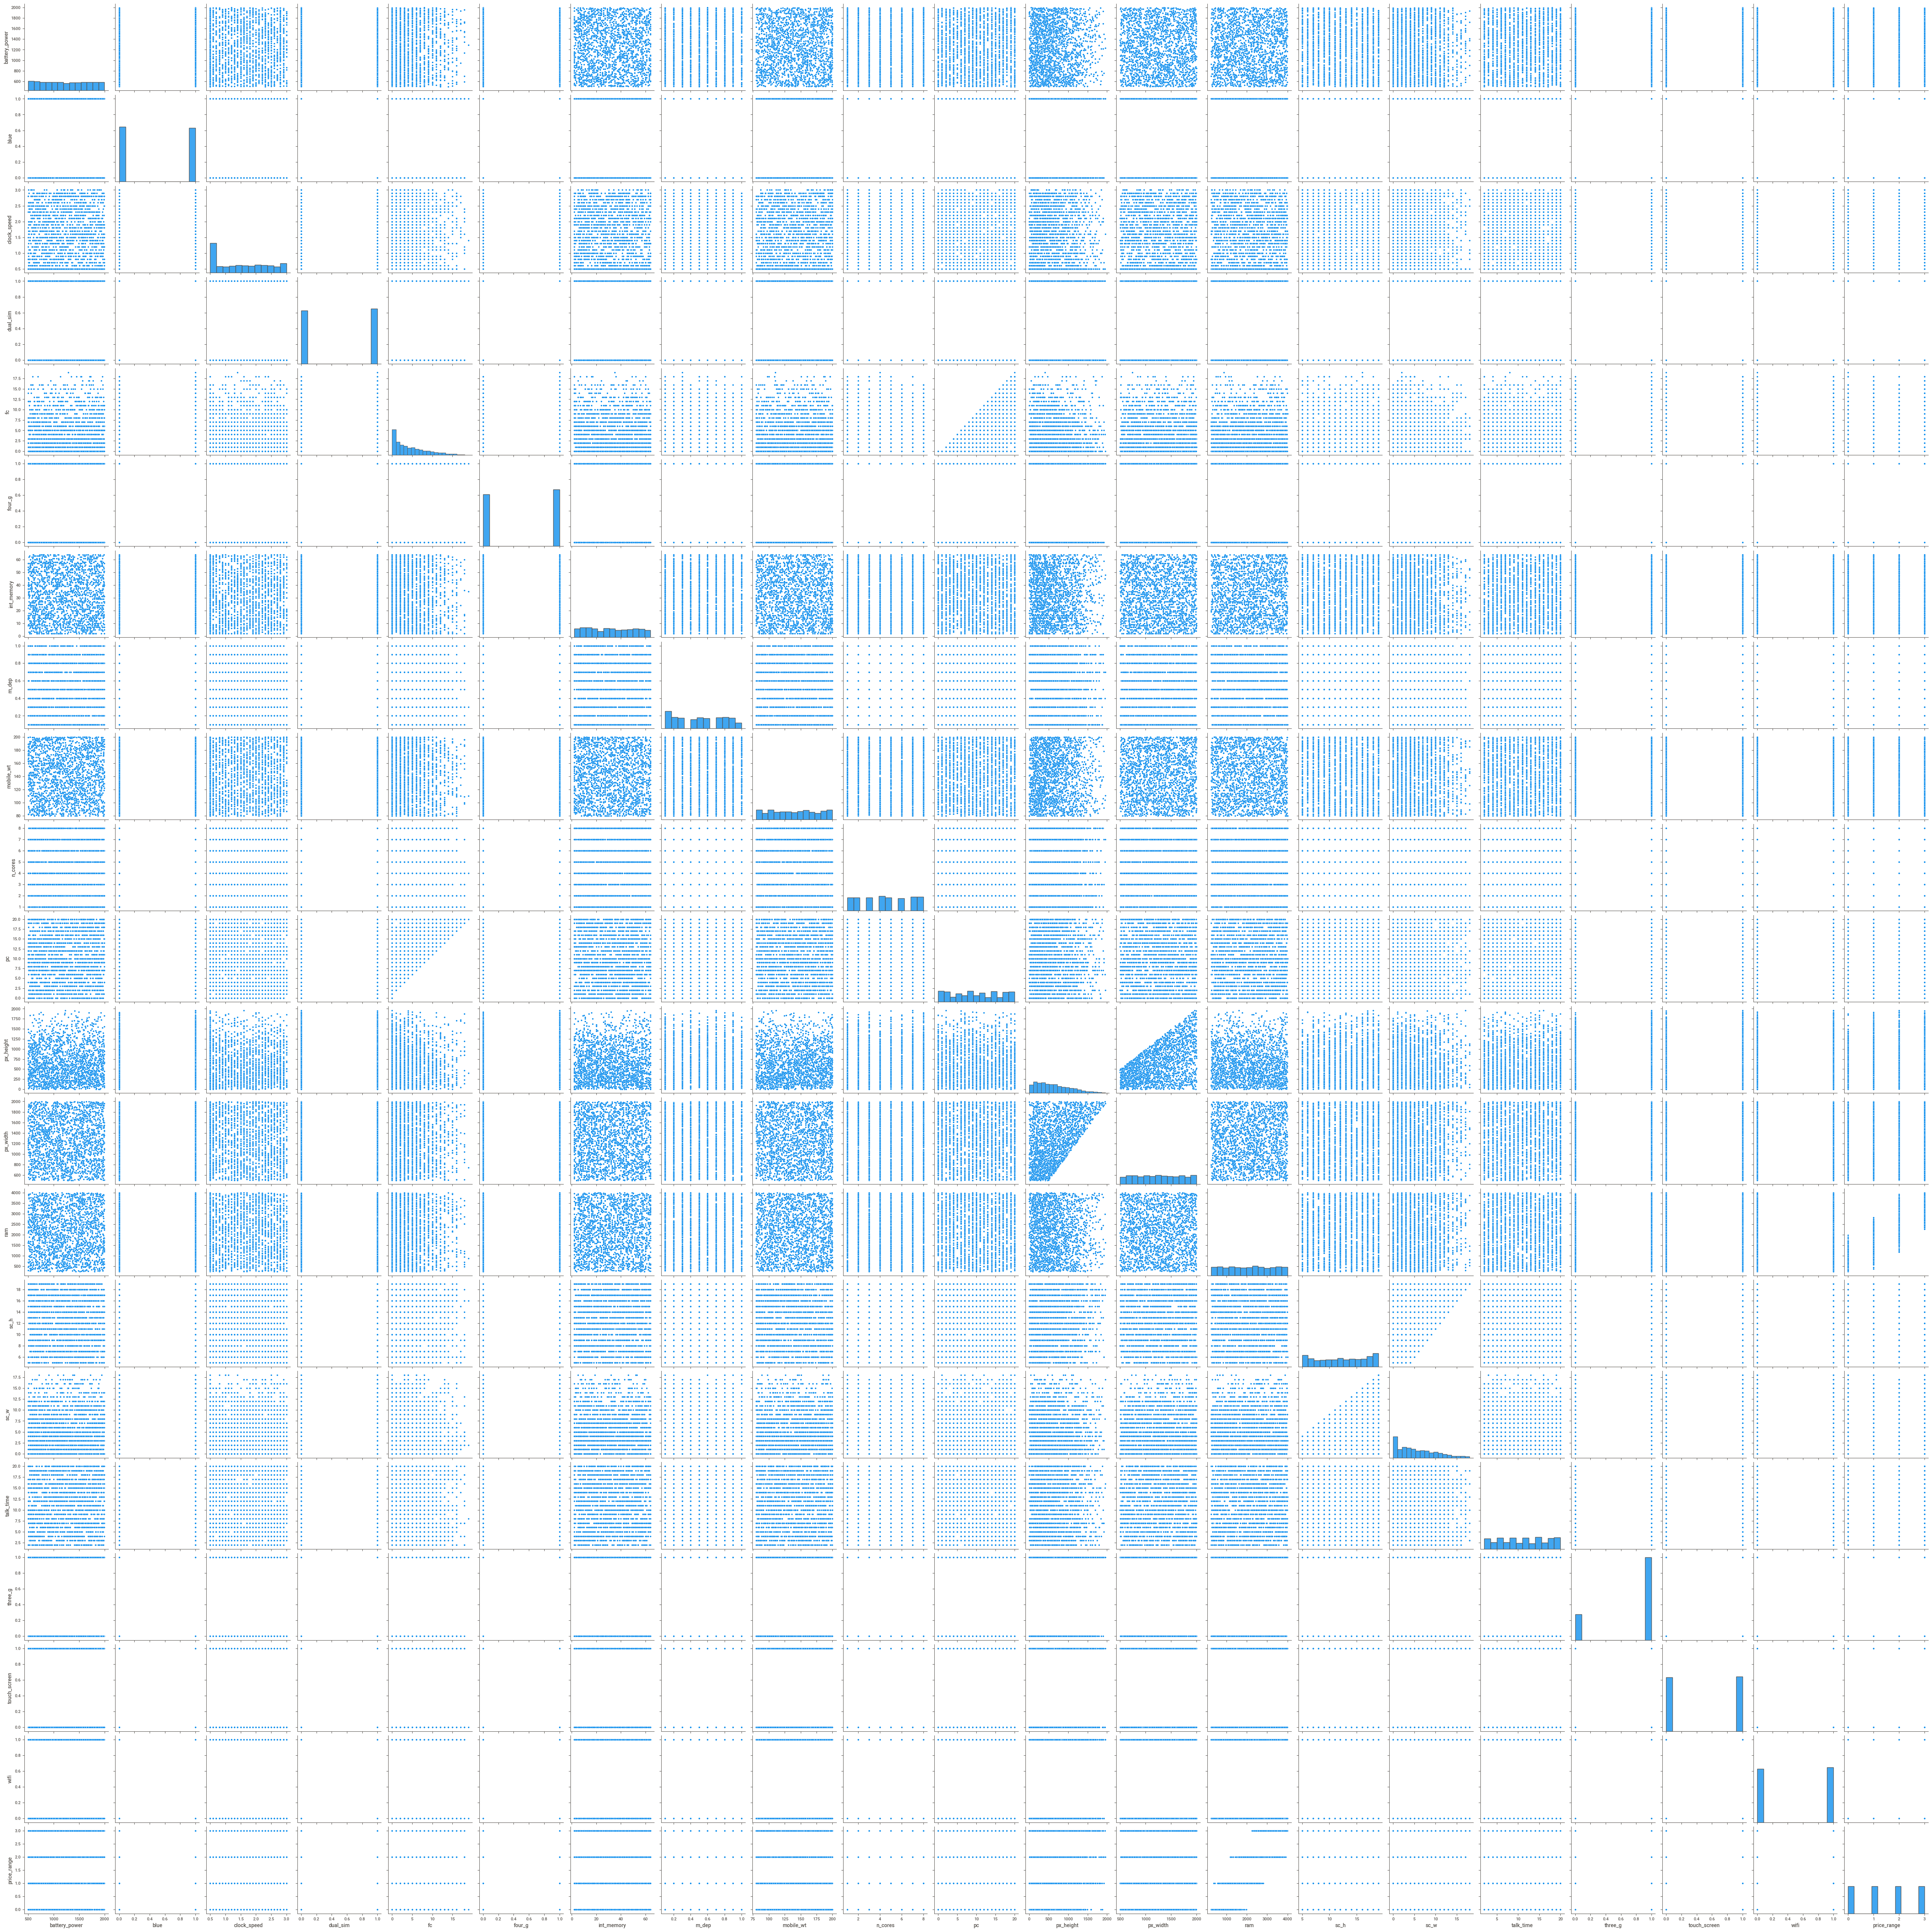

In [19]:
sns.pairplot(data)
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

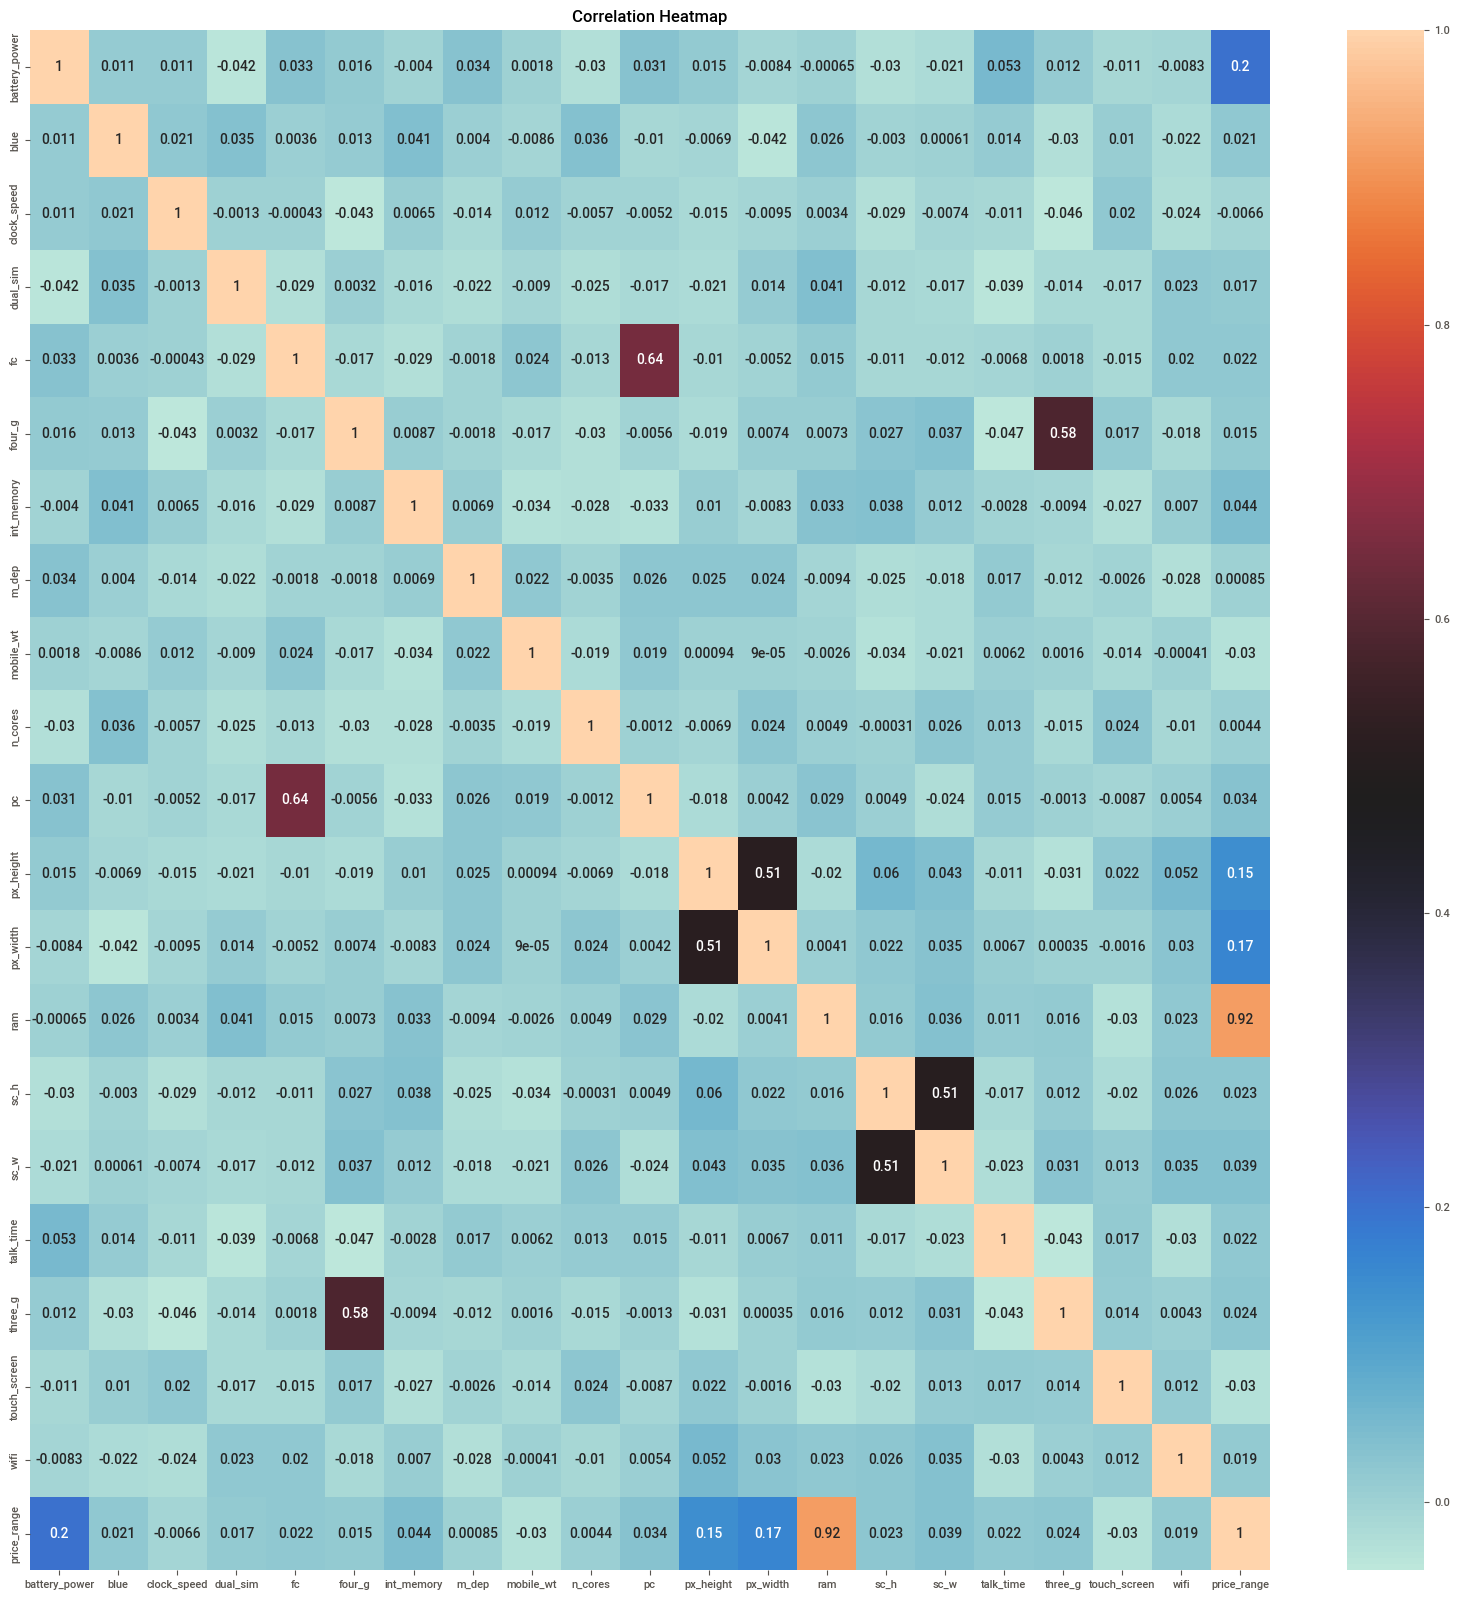

In [20]:
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap')
sns.heatmap(data.corr(),annot=True,cmap='icefire')

In [21]:
data.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

## Data preprocessing

In [22]:
# Library for statistical operations
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats

In [24]:
# Creating function to find outliers in column and replacing it with median
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    column[(column < lower_bound) | (column > upper_bound)] = column.median()

# Step 3: Apply the function to all numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['number']).columns

for column in numeric_columns:
    handle_outliers_iqr(data[column])

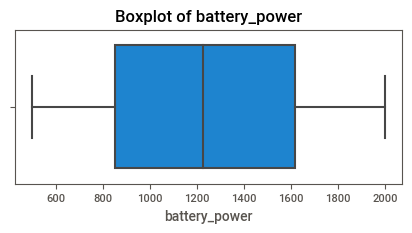

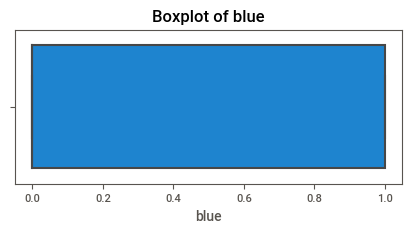

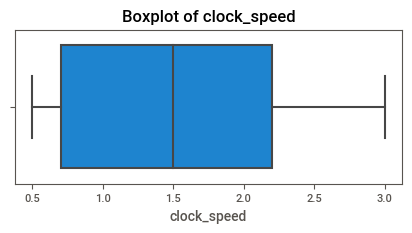

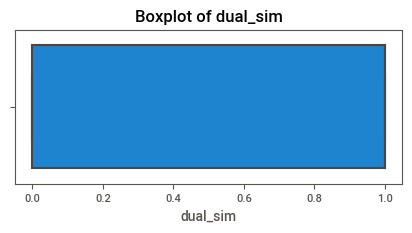

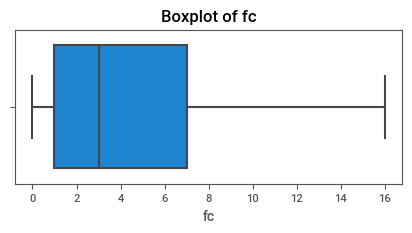

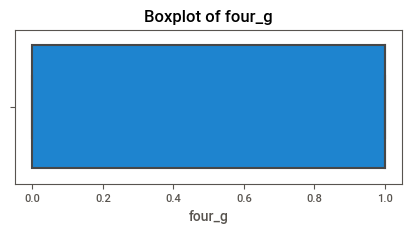

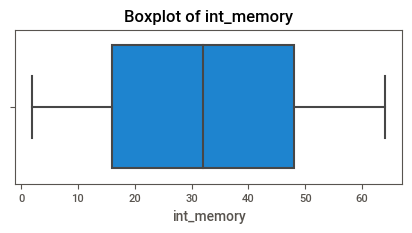

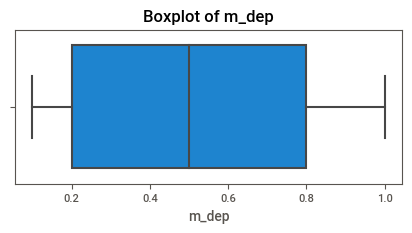

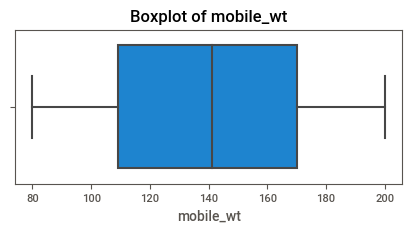

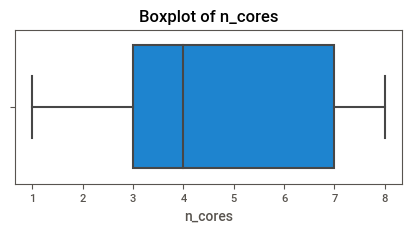

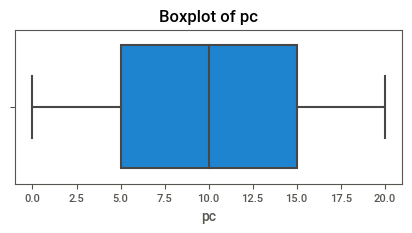

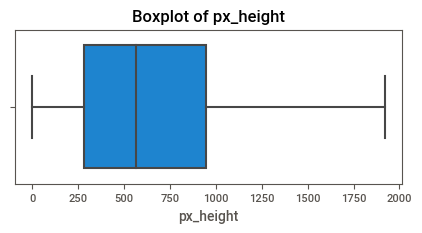

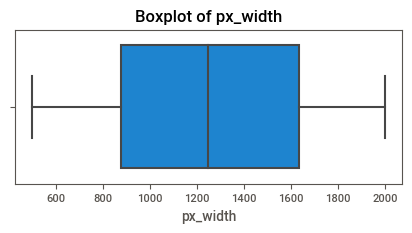

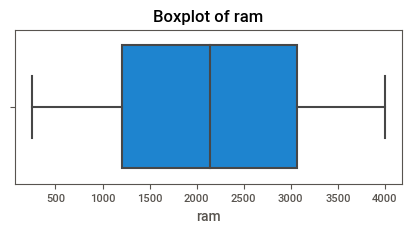

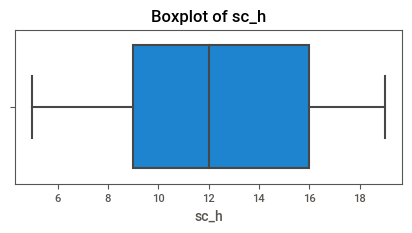

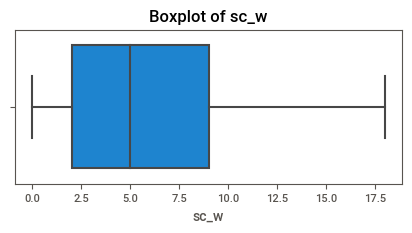

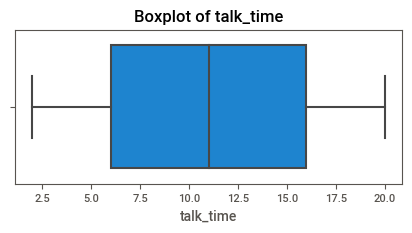

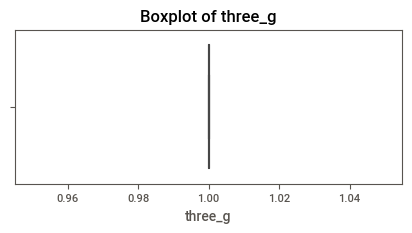

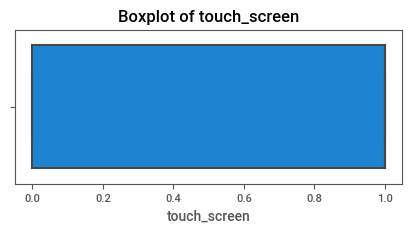

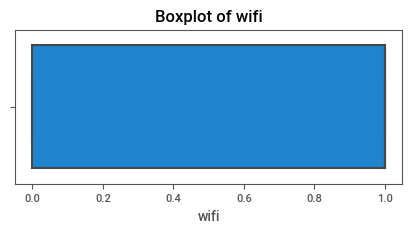

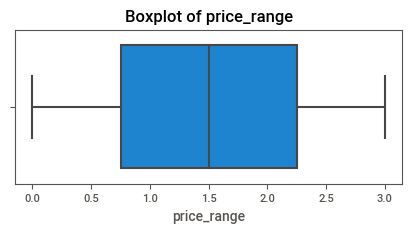

In [28]:
 #Selecting columns having numberic datatype to plot boxplot
columns_number_type = data.select_dtypes(exclude='object').columns

for column in columns_number_type:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=column, data=data)
    plt.title(f"Boxplot of {column}")
    plt.show() 

In [30]:
scaling =data.iloc[ : , :-1]

In [31]:
scaling

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  
0            19        1             0     1  
1             7        1             1     0  
2             9        1             1     0  
3            11        1             0     0  
4            15        1             1     0  
...         ...      ...           ...   ...  
1995         19        1             1     0  
1996         16        1             1     1  
1997          5        1             1     0  
1998         19        1             1     1  
1999          2        1             1     1  

[2000 rows x 20 columns]

In [34]:
# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler =StandardScaler()
A =scaler.fit_transform(scaling)
data1 = pd.DataFrame (A, columns=["battery_power",'blue','clock_speed','dual_sim','fc' ,'four_g' ,'int_memory',
                                  'm_dep','mobile_wt','n_cores','pc' ,'px_height','px_width' ,'ram' ,'sc_h','sc_w','talk_time',
                                  'three_g' ,'touch_screen','wifi'
])
data1

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -0.902597 -0.990050     0.830779 -1.019184 -0.765716 -1.043966   
1         -0.495139  1.010051    -1.253064  0.981177 -1.006735  0.957886   
2         -1.537686  1.010051    -1.253064  0.981177 -0.524698  0.957886   
3         -1.419319  1.010051     1.198517 -1.019184 -1.006735 -1.043966   
4          1.325906  1.010051    -0.395011 -1.019184  2.126507  0.957886   
...             ...       ...          ...       ...       ...       ...   
1995      -1.011860  1.010051    -1.253064  0.981177 -1.006735  0.957886   
1996       1.653694  1.010051     1.321096  0.981177 -1.006735 -1.043966   
1997       1.530773 -0.990050    -0.762748  0.981177 -0.765716  0.957886   
1998       0.622527 -0.990050    -0.762748 -1.019184 -0.042660  0.957886   
1999      -1.658331  1.010051     0.585621  0.981177  0.198358  0.957886   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
0      -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.411960   
1       1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.591487   
2       0.493546  1.381165   0.134244  0.209639 -0.645989   1.401921   
3      -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.295523   
4       0.658915  0.340740   0.021220 -1.101971  0.673534   1.277413   
...          ...       ...        ...       ...       ...        ...   
1995   -1.656260  1.034357  -0.967737  0.646842  0.673534   1.309105   
1996    0.383299 -1.046495   1.320993 -0.227564 -1.140810   0.614124   
1997    0.217930  0.687548  -0.911225  1.521249 -1.140810   0.507727   
1998    0.769162 -1.393304   0.134244  0.209639 -0.810929  -0.696605   
1999    0.714039  1.381165   0.784130  0.646842  1.003414  -0.363829   

      px_width       ram      sc_h      sc_w  talk_time  three_g  \
0    -1.146784  0.391703 -0.784983  0.283103   1.462493      0.0   
1     1.704465  0.467317  1.114266 -0.635317  -0.734267      0.0   
2     1.074968  0.441498 -0.310171 -0.864922  -0.368140      0.0   
3     1.236971  0.594569  0.876859  0.512708  -0.002014      0.0   
4    -0.091452 -0.657666 -1.022389 -0.864922   0.730240      0.0   
...        ...       ...       ...       ...        ...      ...   
1995  1.477661 -1.342799  0.164641 -0.405712   1.462493      0.0   
1996  1.651235 -0.085031 -0.310171  0.971917   0.913303      0.0   
1997  0.880565  0.860139 -0.784983 -1.094526  -1.100394      0.0   
1998 -1.345816 -1.157454  1.351672  0.971917   1.462493      0.0   
1999 -1.151413  1.655004  1.589078 -0.405712  -1.649584      0.0   

      touch_screen      wifi  
0        -1.006018  0.986097  
1         0.994018 -1.014099  
2         0.994018 -1.014099  
3        -1.006018 -1.014099  
4         0.994018 -1.014099  
...            ...       ...  
1995      0.994018 -1.014099  
1996      0.994018  0.986097  
1997      0.994018 -1.014099  
1998      0.994018  0.986097  
1999      0.994018  0.986097  

[2000 rows x 20 columns]

In [35]:
scaler=MinMaxScaler()
scaler1=scaler.fit_transform(data1)
final_scaled = pd.DataFrame(scaler1, columns=["battery_power",'blue','clock_speed','dual_sim','fc' ,'four_g' ,'int_memory',
                                  'm_dep','mobile_wt','n_cores','pc' ,'px_height','px_width' ,'ram' ,'sc_h','sc_w','talk_time',
                                  'three_g' ,'touch_screen','wifi'])

In [36]:
final_scaled

battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
0          0.227789   0.0         0.68       0.0  0.0625     0.0    0.080645   
1          0.347361   1.0         0.00       1.0  0.0000     1.0    0.822581   
2          0.041416   1.0         0.00       1.0  0.1250     1.0    0.629032   
3          0.076152   1.0         0.80       0.0  0.0000     0.0    0.129032   
4          0.881764   1.0         0.28       0.0  0.8125     1.0    0.677419   
...             ...   ...          ...       ...     ...     ...         ...   
1995       0.195725   1.0         0.00       1.0  0.0000     1.0    0.000000   
1996       0.977956   1.0         0.84       1.0  0.0000     0.0    0.596774   
1997       0.941884   0.0         0.16       1.0  0.0625     1.0    0.548387   
1998       0.675351   0.0         0.16       0.0  0.2500     1.0    0.709677   
1999       0.006012   1.0         0.60       1.0  0.3125     1.0    0.693548   

         m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
0     0.555556   0.900000  0.142857  0.10   0.010417  0.170895  0.612774   
1     0.666667   0.466667  0.285714  0.30   0.471354  0.993324  0.634687   
2     0.888889   0.541667  0.571429  0.30   0.657812  0.811749  0.627205   
3     0.777778   0.425000  0.714286  0.45   0.633333  0.858478  0.671566   
4     0.555556   0.508333  0.142857  0.70   0.629167  0.475300  0.308658   
...        ...        ...       ...   ...        ...       ...       ...   
1995  0.777778   0.216667  0.714286  0.70   0.636458  0.927904  0.110102   
1996  0.111111   0.891667  0.428571  0.15   0.476562  0.977971  0.474613   
1997  0.666667   0.233333  1.000000  0.15   0.452083  0.755674  0.748530   
1998  0.000000   0.541667  0.571429  0.25   0.175000  0.113485  0.163816   
1999  0.888889   0.733333  0.714286  0.80   0.251563  0.169559  0.978888   

          sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
0     0.285714  0.388889   0.944444      0.0           0.0   1.0  
1     0.857143  0.166667   0.277778      0.0           1.0   0.0  
2     0.428571  0.111111   0.388889      0.0           1.0   0.0  
3     0.785714  0.444444   0.500000      0.0           0.0   0.0  
4     0.214286  0.111111   0.722222      0.0           1.0   0.0  
...        ...       ...        ...      ...           ...   ...  
1995  0.571429  0.222222   0.944444      0.0           1.0   0.0  
1996  0.428571  0.555556   0.777778      0.0           1.0   1.0  
1997  0.285714  0.055556   0.166667      0.0           1.0   0.0  
1998  0.928571  0.555556   0.944444      0.0           1.0   1.0  
1999  1.000000  0.222222   0.000000      0.0           1.0   1.0  

[2000 rows x 20 columns]

In [37]:
# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

In [39]:
X = final_scaled
y= data['price_range'].astype('int64')

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train

battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
968        0.949900   0.0         0.00       1.0  0.4375     0.0    0.709677   
240        0.088176   1.0         0.68       0.0  0.0000     1.0    0.758065   
819        0.490982   0.0         0.16       1.0  0.1250     1.0    0.887097   
692        0.187041   0.0         0.24       0.0  0.1250     0.0    0.580645   
420        0.637943   1.0         0.00       1.0  0.4375     0.0    0.080645   
...             ...   ...          ...       ...     ...     ...         ...   
1130       0.984636   1.0         0.56       1.0  0.1250     0.0    0.467742   
1294       0.058784   1.0         0.00       0.0  0.0625     1.0    0.919355   
860        0.887108   1.0         0.00       0.0  0.0000     1.0    0.209677   
1459       0.952572   0.0         0.16       1.0  0.1875     0.0    0.145161   
1126       0.089512   1.0         0.04       1.0  0.0625     1.0    0.774194   

         m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
968   0.444444   0.925000  0.000000  0.50   0.399479  0.840454  0.329503   
240   0.000000   0.491667  1.000000  0.05   0.275521  0.339786  0.882950   
819   0.000000   0.900000  0.000000  0.70   0.269271  0.206275  0.307322   
692   0.333333   0.983333  0.571429  0.35   0.158333  0.783712  0.869054   
420   0.333333   0.208333  0.571429  0.60   0.428646  0.403204  0.355692   
...        ...        ...       ...   ...        ...       ...       ...   
1130  0.888889   0.591667  0.000000  0.85   0.403646  0.738985  0.739177   
1294  0.666667   0.550000  1.000000  0.20   0.395312  0.906542  0.028327   
860   0.333333   0.666667  0.571429  0.35   0.379688  0.512016  0.487440   
1459  0.333333   0.916667  1.000000  0.60   0.255729  0.671562  0.710850   
1126  0.222222   0.141667  0.571429  0.65   0.100521  0.326435  0.494655   

          sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
968   0.357143  0.500000   0.055556      0.0           1.0   1.0  
240   0.428571  0.055556   0.777778      0.0           1.0   1.0  
819   0.642857  0.666667   1.000000      0.0           0.0   1.0  
692   0.571429  0.444444   0.166667      0.0           0.0   1.0  
420   0.071429  0.277778   1.000000      0.0           0.0   1.0  
...        ...       ...        ...      ...           ...   ...  
1130  0.571429  0.277778   0.944444      0.0           0.0   1.0  
1294  0.785714  0.555556   0.222222      0.0           1.0   1.0  
860   0.785714  0.611111   0.555556      0.0           0.0   1.0  
1459  0.785714  0.611111   0.888889      0.0           1.0   1.0  
1126  0.571429  0.666667   0.555556      0.0           0.0   0.0  

[1600 rows x 20 columns]

In [42]:
X_test

battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
1860       0.764863   0.0         0.80       0.0  0.1875     1.0    0.370968   
353        0.454910   0.0         0.00       0.0  0.4375     1.0    0.096774   
1333       0.982632   0.0         0.96       0.0  0.5625     0.0    0.193548   
905        0.325985   1.0         0.60       0.0  0.2500     0.0    0.241935   
1289       0.076152   1.0         0.00       1.0  0.4375     0.0    0.903226   
...             ...   ...          ...       ...     ...     ...         ...   
965        0.586506   0.0         0.00       1.0  0.0625     0.0    0.274194   
1284       0.327321   0.0         0.60       0.0  0.1250     1.0    0.161290   
1739       0.362725   0.0         0.52       0.0  0.2500     1.0    0.161290   
261        0.151637   0.0         0.88       1.0  0.0000     0.0    0.370968   
535        0.456914   0.0         0.56       0.0  0.0000     0.0    0.467742   

         m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
1860  0.555556   1.000000  0.142857  0.25   0.109896  0.739653  0.114912   
353   0.444444   0.483333  1.000000  0.80   0.143229  0.324433  0.616515   
1333  0.333333   0.966667  0.857143  0.90   0.152604  0.301736  0.283271   
905   0.111111   0.716667  0.285714  0.95   0.133333  0.596796  0.971673   
1289  0.444444   0.416667  0.571429  0.40   0.531771  0.973298  0.440941   
...        ...        ...       ...   ...        ...       ...       ...   
965   0.222222   0.450000  1.000000  0.85   0.201563  0.114152  0.977018   
1284  0.222222   0.650000  0.571429  0.30   0.629687  0.786382  0.469802   
1739  0.666667   0.200000  0.714286  0.25   0.640625  0.509346  0.411010   
261   0.111111   0.066667  0.428571  0.05   0.273958  0.686916  0.476483   
535   0.333333   0.600000  1.000000  0.35   0.435937  0.762350  0.585516   

          sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
1860  0.214286  0.333333   0.500000      0.0           1.0   0.0  
353   1.000000  0.944444   0.944444      0.0           0.0   0.0  
1333  0.214286  0.055556   0.333333      0.0           1.0   0.0  
905   0.928571  0.388889   0.944444      0.0           1.0   0.0  
1289  0.642857  0.277778   0.166667      0.0           0.0   0.0  
...        ...       ...        ...      ...           ...   ...  
965   0.428571  0.111111   0.944444      0.0           1.0   1.0  
1284  0.428571  0.500000   0.444444      0.0           0.0   0.0  
1739  0.928571  0.388889   0.944444      0.0           1.0   1.0  
261   0.000000  0.055556   0.555556      0.0           1.0   1.0  
535   0.785714  0.111111   0.055556      0.0           1.0   1.0  

[400 rows x 20 columns]

In [43]:
print("Shape of training dataset is: ", X_train.shape)

Shape of training dataset is:  (1600, 20)


In [44]:
y_train.value_counts()

1    409
2    408
0    395
3    388
Name: price_range, dtype: int64

# Logistics Regression

In [45]:
# imorting logisting regression liabrary
from sklearn.linear_model import LogisticRegression

In [46]:
Model =LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Make predictions on the test data
y_pred_log = Model.predict(X_test)

In [48]:
# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[105   0   0   0]
 [  1  88   2   0]
 [  0   8  78   6]
 [  0   0   3 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.92      0.97      0.94        91
           2       0.94      0.85      0.89        92
           3       0.95      0.97      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [49]:
y_test.value_counts()

3    112
0    105
2     92
1     91
Name: price_range, dtype: int64

In [54]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

# K-Means Classifier Algorithm


In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.cluster import KMeans 
# Initialise the model with K as 3
model4=KMeans (n_clusters=3,random_state=15)


model4.fit(X_train)


KMeans(n_clusters=3, random_state=15)

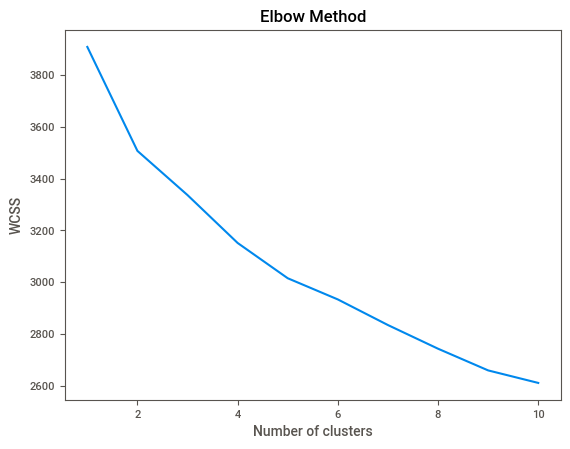

In [56]:
#Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# Initialise the model with K as 3
model5 = KMeans(n_clusters=2, random_state=15)

# Training the model
model5.fit(X_train)

KMeans(n_clusters=2, random_state=15)

In [58]:
y_pred_kmeans = model5.predict(X_test)

In [59]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_kmeans)
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
class_report = classification_report(y_test, y_pred_kmeans)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.22

Confusion Matrix:

[[45 60  0  0]
 [49 42  0  0]
 [42 50  0  0]
 [48 64  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.43      0.31       105
           1       0.19      0.46      0.27        91
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00       112

    accuracy                           0.22       400
   macro avg       0.11      0.22      0.15       400
weighted avg       0.11      0.22      0.14       400



# KNN 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate=[]
for i in range (1,11):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))#it calculates the proportion of misclassified samples in the test set

In [62]:
error_rate

[0.5775, 0.58, 0.5875, 0.615, 0.6, 0.5625, 0.565, 0.5675, 0.535, 0.5475]

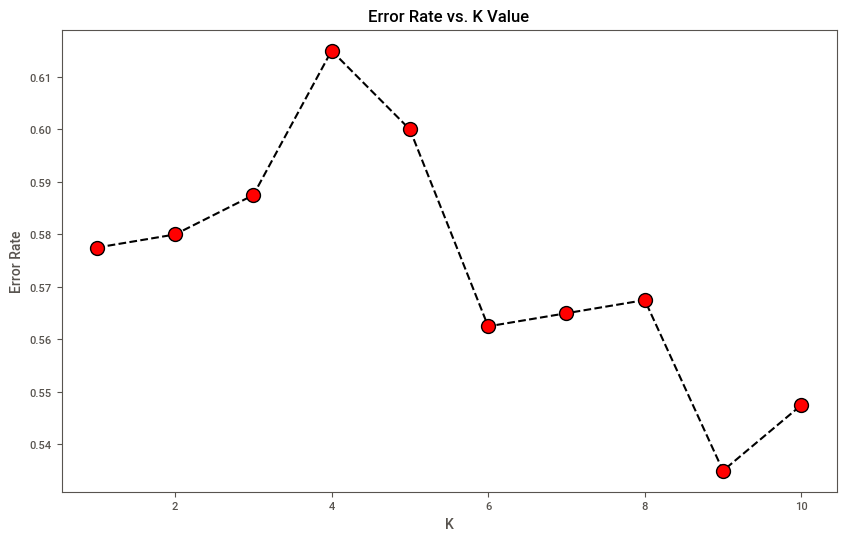

In [63]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='black',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [64]:
acc=[]
# Will take some time
from sklearn import metrics
for i in range (1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    Y_pred = knn2.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))

Maximum accuracy: 0.465 at K = 8


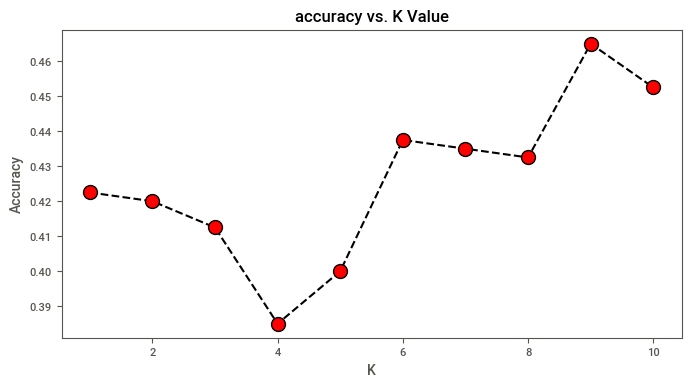

In [65]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),acc,color='black',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)))

In [66]:
y_pred_knn = knn.predict(X_test)

In [67]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.45

Confusion Matrix:

[[62 29 11  3]
 [32 36 18  5]
 [11 30 37 14]
 [ 2 21 43 46]]

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       105
           1       0.31      0.40      0.35        91
           2       0.34      0.40      0.37        92
           3       0.68      0.41      0.51       112

    accuracy                           0.45       400
   macro avg       0.48      0.45      0.45       400
weighted avg       0.49      0.45      0.46       400



# SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svcclassifier =SVC()
svcclassifier.fit(X_train,y_train)

SVC()

In [70]:
# Predict the output using trained data
y_pred_svm = svcclassifier.predict(X_test)

In [71]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.88

Confusion Matrix:

[[98  7  0  0]
 [ 5 80  6  0]
 [ 0 12 75  5]
 [ 0  0 15 97]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.81      0.88      0.84        91
           2       0.78      0.82      0.80        92
           3       0.95      0.87      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
# Predict the output for test dataset
y_pred_tree = DT.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.82

Confusion Matrix:

[[ 92  13   0   0]
 [  8  75   8   0]
 [  0  13  63  16]
 [  0   0  12 100]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       105
           1       0.74      0.82      0.78        91
           2       0.76      0.68      0.72        92
           3       0.86      0.89      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [76]:
%%time
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4, 5, 6, 7],     
    "min_samples_leaf":list(range(1, 10))
    
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, 
                       scoring="accuracy",           # Evaluation metric to evaluate the model
                       n_jobs=-1,                    # Numbers of cores used to execute this code
                       verbose=1, cv=3)

# Fit the model with each parameters
tree_cv.fit(X_train, y_train)

# It will print Best Parameters
best_params = tree_cv.best_params_ 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4104 candidates, totalling 12312 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'})
CPU times: total: 3.59 s
Wall time: 18.9 s


In [77]:
# Passing best parameter to decision tree
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf= 6, min_samples_split=2, splitter='best')

# Training model with best parameter
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [78]:
# Predicton using Decision Tree
y_pred_hyper_decision = dt1.predict(X_test)

In [79]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_hyper_decision)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_decision)
class_report = classification_report(y_test, y_pred_hyper_decision)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.81

Confusion Matrix:

[[96  9  0  0]
 [ 5 68 18  0]
 [ 0 12 66 14]
 [ 0  0 20 92]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       105
           1       0.76      0.75      0.76        91
           2       0.63      0.72      0.67        92
           3       0.87      0.82      0.84       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



# Random Forest Algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=200)

rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [81]:
y_pred_forest = rf.predict(X_test)

In [82]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
class_report = classification_report(y_test, y_pred_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[ 99   6   0   0]
 [  5  79   7   0]
 [  0   8  77   7]
 [  0   0  12 100]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.85      0.87      0.86        91
           2       0.80      0.84      0.82        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



In [83]:
%%time
# Time taken to execute this cell

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 87.75%
CPU times: total: 6.3 s
Wall time: 2min 12s


In [84]:
rf_clf2 = RandomForestClassifier(bootstrap = True, max_depth= 10, max_features= 'sqrt', min_samples_leaf=2, min_samples_split= 10, n_estimators=200, random_state= 42)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [85]:
y_pred_hyper_forest = rf_clf2.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred_hyper_forest)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_forest)
class_report = classification_report(y_test, y_pred_hyper_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)


Accuracy: 0.89

Confusion Matrix:

[[101   4   0   0]
 [  6  78   7   0]
 [  0   8  76   8]
 [  0   0  11 101]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.86      0.86        91
           2       0.81      0.83      0.82        92
           3       0.93      0.90      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# Bagging Algorithm

In [88]:
LR = LogisticRegression()

In [89]:
model_bagg = BaggingClassifier(base_estimator = LR, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [90]:
y_pred_bagg_log = model_bagg.predict(X_test)

In [91]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_log)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_log)
class_report = classification_report(y_test, y_pred_bagg_log)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.94

Confusion Matrix:

[[105   0   0   0]
 [  1  87   3   0]
 [  0   9  77   6]
 [  0   0   4 108]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.91      0.96      0.93        91
           2       0.92      0.84      0.88        92
           3       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



# Bagging using KNN

In [92]:
# Create a KNN classifier with 3 neighbors
KNN = KNeighborsClassifier(n_neighbors=3)

In [93]:
# Initialise the Bagging Classifier Model using base model of KNN
model_bagg = BaggingClassifier(base_estimator=KNN, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100)

In [94]:
y_pred_bagg_knn = model_bagg.predict(X_test)

In [95]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_knn)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_knn)
class_report = classification_report(y_test, y_pred_bagg_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.45

Confusion Matrix:

[[53 31 14  7]
 [26 26 29 10]
 [ 6 24 42 20]
 [ 4 15 33 60]]

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       105
           1       0.27      0.29      0.28        91
           2       0.36      0.46      0.40        92
           3       0.62      0.54      0.57       112

    accuracy                           0.45       400
   macro avg       0.46      0.45      0.45       400
weighted avg       0.47      0.45      0.46       400



# Boosting Technique

In [96]:
gbm = GradientBoostingClassifier()

# Fit the Gradient Boosting Classifier
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred_gbm = gbm.predict(X_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_gbm)
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
class_report = classification_report(y_test, y_pred_gbm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[101   4   0   0]
 [  4  80   7   0]
 [  0   7  78   7]
 [  0   0  11 101]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.88      0.88      0.88        91
           2       0.81      0.85      0.83        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



# Conclusion


 *Out of the test we performed with different classifiers, we are worked on in it that Logistc Regression is Best Algorithm considering the parameters followed by Decision Tree, Random Forest,SVM .

 *So we can go with either for  Decision Tree, Random Forest and  or Logistic Regression models,SVM.
 
 *In the boosting techniques there is best suitable is for that project is Gradient boosting technique.
 